# OpenCVの利用

[OpenCV](http://opencv.org/)(Open Source Computer Vision Library) はBSDライセンスで公開されている画像処理ライブラリです。Pythonのインタフェースが用意されているので、比較的手軽に利用できます。

### anaconda を用いたインストール

1. Anaconda Promptを開く
1. conda config --add channels conda-forge
1. conda install opencv

### 参考資料

* [Pyconjp 2014 OpenCVのpythonインターフェース入門](https://www.slideshare.net/payashim/pyconjp-2014-opencv)
* [openCVで物体認識 by traincascade](http://qiita.com/yshi12/items/ee2adc63378283e51458)

動作確認

In [1]:
%matplotlib inline
import numpy as np
import cv2, matplotlib
import matplotlib.pyplot as plt

print(cv2.__version__)

3.2.0


画像表示

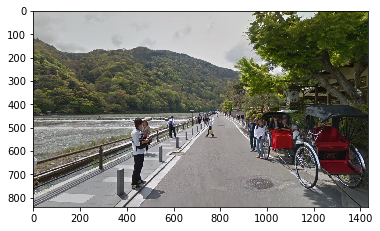

In [2]:
def read_img(name_i):
    img = cv2.imread(name_i)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # 色の変換
    return img

# 画像の読み込み
#img = read_img('lenna.png')
#img = read_img('s.jpg')
#img = read_img('d.png')
img = read_img('a.png')

# 画像の表示
plt.imshow(img)

濃淡画像への変換

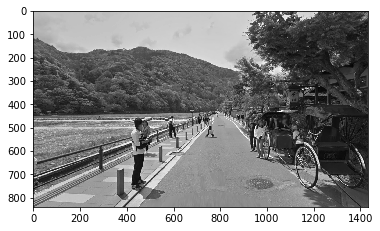

In [3]:
gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
plt.imshow(gray)
plt.gray()

## フィルタの適用

X方向のSobelフィルタ

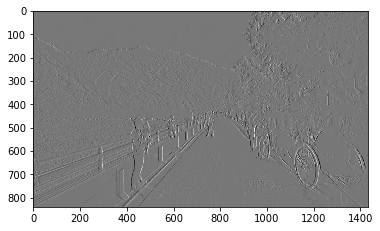

In [4]:
sobelx = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=5)
plt.imshow(sobelx)
plt.gray()

y方向のSobelフィルタ

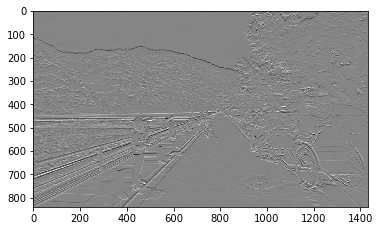

In [5]:
sobely = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=5)
plt.imshow(sobely)
plt.gray()

画像を2値化して、輪郭を抽出。

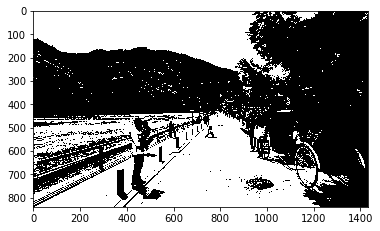

In [6]:
ret, thresh = cv2.threshold(gray, 128, 255, 0)
im2, contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
plt.imshow(im2)

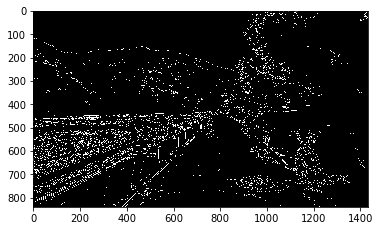

In [7]:
canny_img = cv2.Canny(im2, 50, 10)
plt.imshow(canny_img)

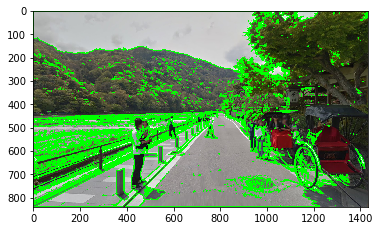

In [8]:
g2 = cv2.drawContours(img, contours, -1, (0,255,0), 3)
plt.imshow(g2)

## 特徴抽出

SIFT特徴量

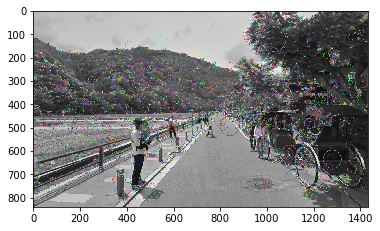

In [9]:
sift = cv2.xfeatures2d.SIFT_create()
kp = sift.detect(gray,None)
#img=cv2.drawKeypoints(gray,kp,img)
kpimg = cv2.drawKeypoints(gray,kp,img,flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
plt.imshow(kpimg)